<a href="https://colab.research.google.com/github/jbrun0r/graphs/blob/main/hungarian_method_grafos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

## Apresentação do Algoritmo Método Húngaro e Demonstração Passo a Passo

Nesta seção, apresentaremos o algoritmo do Método Húngaro e forneceremos uma demonstração passo a passo aplicando-o a um grafo arbitrário. O objetivo é ilustrar claramente como o método opera, destacando as arestas que são adicionadas ao emparelhamento a cada passo do algoritmo. Isso proporcionará uma compreensão visual e detalhada do processo de alocação otimizada entre funcionários e máquinas.

A alocação de tarefas, um caso específico do problema de transporte, busca uma alocação ótima. Composto por $m$ locais de oferta, cada um fornecendo até $a_i$ unidades, e $n$ locais de demanda, onde cada local $j$ deve receber pelo menos $b_j$ unidades. Denotamos por $c_{ij}$ o custo de transportar cada unidade da oferta $i$ para a demanda $j$.

A matriz-custo é a matriz $C_{mn}$ dada por:

\begin{bmatrix}
c_{11} & \dots & c_{1n} \\
\vdots & \ddots & \vdots \\
c_{m1} & \dots & c_{mn}
\end{bmatrix}

onde cada elemento $C_{ij}$ é o custo para transportar cada produto da i-ésima origem ao j-ésimo
destino.

Considere $a_i$ como as unidades disponíveis nas origens e $b_j$ como as unidades necessárias nos destinos. Um problema de transporte é classificado como balanceado quando a soma total das ofertas é igual à soma total das demandas, representada pela condição:

<center>
$\sum\limits_{i=1}^{m} a_i = \sum\limits_{j=1}^{n} b_j$,
</center>

Nesse cenário, a oferta atende completamente à demanda.

Um problema de transporte balanceado quando $a_i = 1$ e $b_j = 1$ para todos $i, j = 1, \ldots, n$, e sujeito às restrições
<center>
$\sum\limits_{j=1}^{n} x_{ij} = 1 \quad \text{para } i = 1, 2, 3, \ldots, n$

$\sum\limits_{i=1}^{n} x_{ij} = 1 \quad \text{para } j = 1, 2, 3, \ldots, n$\
</center>

é dito problema de alocação de tarefas.

Neste cenário, onde cada local de oferta contribui com apenas uma unidade para cada local de demanda, as variáveis do problema são simplificadas para:

* $x_{ij} = 1$, se o local de oferta $i$ fornece para o local de demanda $j$,
* $x_{ij} = 0$, caso contrário.

Assim, o custo da alocação é representado pela soma:
<center>
$\sum_{j=1}^{n} c_{jkj}$,
</center>

onde $c_{jk}$ são as entradas da matriz-custo relacionadas às posições da alocação, e os índices $jk$ são distintos dois a dois.

O Método Húngaro, desenvolvido em 1931 pelos húngaros E. Egerváry e D. König, foi fundamentado em um teorema combinatório demonstrado por König em 1916. A denominação "Método Húngaro" foi adotada em 1955 por H. W. Kuhn em homenagem aos descobridores do algoritmo. Este método é aplicável a uma variedade de problemas de alocação de tarefas.

O Método Húngaro é fundamentado na seguinte ideia: considere uma matriz-custo $C_{nm}$ com entradas não negativas, contendo $n$ zeros de forma que dois deles não estejam na mesma linha ou coluna. A alocação ótima terá soma nula.

Com base nessa ideia e utilizando o Teorema da Alocação Ótima, são realizadas operações de soma ou subtração em todas as entradas de uma linha ou coluna da matriz-custo. Isso é feito para identificar claramente os zeros necessários para a alocação ótima.

Antes de apresentar o Método Húngaro, é necessário garantir que o problema atenda às seguintes condições:



1. A matriz-custo é quadrada.
2. As entradas da matriz-custo são números inteiros.
3. O problema é de minimização.

Caso o problema não atenda a essas condições, é possível ajustá-lo da seguinte maneira:

* Introduza uma tarefa ou instalação fictícia para satisfazer a primeira condição.
* Para facilitar cálculos, as entradas podem ser números reais, mas recomenda-se a conversão para inteiros.
* Se o problema for de maximização, pode-se convertê-lo para um de minimização.

Os passos do Método Húngaro para uma matriz-custo $C_{nn}$ são os seguintes:

1. Subtraia a menor entrada de cada linha de todas as entradas da mesma linha.
2. Subtraia a menor entrada de cada coluna de todas as entradas da mesma coluna.
3. Risque um traço ao longo de linhas e colunas para cobrir zeros, utilizando o número mínimo de traços possível.
4. Teste de Otimalidade:
  * Se o número mínimo de traços necessários para cobrir os zeros é $n$, então uma alocação ótima de zeros é possível, e o procedimento é encerrado.
  * Se o número mínimo de traços necessários para cobrir os zeros é menor do que $n$, continue com o Passo 5.
5. Determine a menor entrada não riscada por nenhum traço. Subtraia essa entrada de todas as entradas não riscadas e some-a a todas as entradas riscadas, tanto na horizontal quanto na vertical. Retorne ao Passo 3.




In [ ]:
def hungarian_algorithm(cost_matrix):
    """
    Implementação do Método Húngaro para resolver o problema de alocação de tarefas.

    Parâmetros:
    - cost_matrix (list): Matriz de custo representando as relações entre funcionários e máquinas.

    Retorna:
    - matching (list): Lista de tuplas representando o emparelhamento final.

    Exemplo:
    >>> cost_matrix = [
    ...     [53, 45, 44],
    ...     [44, 50, 45],
    ...     [45, 47, 43]
    ... ]
    >>> matching = hungarian_algorithm(cost_matrix)
    >>> print(matching)
    [(0, 2), (1, 1), (2, 0)]
    """
    cost_matrix = np.array(cost_matrix)

    cost_matrix -= cost_matrix.min(axis=1, keepdims=True)
    cost_matrix -= cost_matrix.min(axis=0, keepdims=True)

    marked_rows = np.zeros(cost_matrix.shape[0], dtype=bool)
    marked_cols = np.zeros(cost_matrix.shape[1], dtype=bool)

    while True:
        marked_zeros = (cost_matrix == 0) & ~marked_rows[:, np.newaxis] & ~marked_cols

        marked_rows |= np.any(marked_zeros, axis=1)
        marked_cols |= np.any(marked_zeros, axis=0)

        num_marked_rows = np.sum(marked_rows)

        if num_marked_rows == cost_matrix.shape[0]:
            break

        unmarked_min = np.min(cost_matrix[~marked_rows][:, ~marked_cols])
        cost_matrix[~marked_rows][:, ~marked_cols] -= unmarked_min
        cost_matrix[marked_rows][:, marked_cols] += unmarked_min

        marked_rows.fill(False)
        marked_cols.fill(False)

    matching = []
    for i in range(cost_matrix.shape[0]):
        j = np.argmax(cost_matrix[i] == 0)
        matching.append((i, j))

    return matching

Os passos do Método Húngaro para uma matriz-custo $C_{nn}$ são os seguintes:

1. **Subtraia a menor entrada de cada linha de todas as entradas da mesma linha.**
    ```python
    cost_matrix -= cost_matrix.min(axis=1, keepdims=True)
    ```

2. **Subtraia a menor entrada de cada coluna de todas as entradas da mesma coluna.**
    ```python
    cost_matrix -= cost_matrix.min(axis=0, keepdims=True)
    ```

3. **Risque um traço ao longo de linhas e colunas para cobrir zeros, utilizando o número mínimo de traços possível.**
    ```python
    marked_rows |= np.any(marked_zeros, axis=1)
    marked_cols |= np.any(marked_zeros, axis=0)
    ```

4. **Teste de Otimalidade:**
    ```python
    if num_marked_rows == cost_matrix.shape[0]:
        break
    ```

5. **Determine a menor entrada não riscada por nenhum traço. Subtraia essa entrada de todas as entradas não riscadas e some-a a todas as entradas riscadas, tanto na horizontal quanto na vertical. Retorne ao Passo 3.**
    ```python
    unmarked_min = np.min(cost_matrix[~marked_rows][:, ~marked_cols])
    cost_matrix[~marked_rows][:, ~marked_cols] -= unmarked_min
    cost_matrix[marked_rows][:, marked_cols] += unmarked_min
    ```


### Problema de minização
O chefe do setor de uma fábrica deseja distribuir a tarefa de operar três máquinas entre seus três funcionários. Para isso, ele elaborou uma tabela com o tempo em minutos que cada funcionário leva para fabricar 100 produtos em cada máquina:

In [ ]:
c = {
    'Máquina': ['Máquina 1', 'Máquina 2', 'Máquina 3'],
    'Funcionário 1': [50, 44, 45],
    'Funcionário 2': [45, 50, 47],
    'Funcionário 3': [44, 45, 43]
}
pd.DataFrame(c)

,Máquina,Funcionário 1,Funcionário 2,Funcionário 3
0,Máquina 1,50,45,44
1,Máquina 2,44,50,45
2,Máquina 3,45,47,43


Qual máquina, cada funcionário deverá executar para que o tempo de produção seja o menor
possível?

A seguinte matriz-custo é a seguinte:

\begin{bmatrix}
50 & 45 & 44 \\
44 & 50 & 45 \\
45 & 47 & 43
\end{bmatrix}

Passo 1: Subtrai-se 44 da primeira linha, 44 da segunda e 43 da terceira linha:
\begin{bmatrix}
6 & 1 & 0 \\
0 & 6 & 1 \\
2 & 4 & 0
\end{bmatrix}

Passo 2: Como a primeira e terceira colunas contém elemento nulo, é subtraído apenas 1 da
segunda coluna:

\begin{bmatrix}
6 & 0 & 0 \\
0 & 5 & 1 \\
2 & 3 & 0
\end{bmatrix}

Passo 3: Risca-se as entradas zero da matriz com um número mínimo de traços horizontais
e verticais, onde os traços serão representados por cores.

Passo 4: Como o número mínimo de traços são três, tem-se uma alocação ótima de zeros:

\begin{bmatrix}
6 & \pmb{0} & 0 \\
\pmb{0} & 5 & 1 \\
2 & 3 & \pmb{0}
\end{bmatrix}

Logo, a distribuição ótima é:

* Funcionário 1 $\leftarrow$ Máquina 2 = 44
* Funcionário 2 $\leftarrow$ Máquina 1 = 45
* Funcionário 3 $\leftarrow$ Máquina 3 = 45

Com tempo total de 45 + 44 + 43 = 132 minutos.



## Funções Complementares

Antes de prosseguirmos com a resolução através do algoritmo implementado com o Método Húngaro, vamos apresentar algumas funções e métodos que nos auxiliarão na visualização da solução do problema.

In [ ]:
def print_matching_steps(cost_matrix, matching):
    """
    Imprime o passo a passo do Método Húngaro com base no emparelhamento obtido.

    Parâmetros:
    - cost_matrix (numpy.ndarray): Matriz de custo original.
    - matching (list): Lista de tuplas representando o emparelhamento, onde cada tupla contém
                      o índice da linha (Funcionário) e o índice da coluna (Máquina).

    Exemplo:
    >>> cost_matrix = np.array([[53, 45, 44], [44, 50, 45], [45, 47, 43]])
    >>> matching = [(0, 2), (1, 1), (2, 0)]
    >>> print_matching_steps(cost_matrix, matching)
    Passo a passo do Método Húngaro:
    Passo 1: Aresta adicionada entre os nós 0 e 2.
    Custo Atual: 44

    Passo 2: Aresta adicionada entre os nós 1 e 1.
    Custo Atual: 50

    Passo 3: Aresta adicionada entre os nós 2 e 0.
    Custo Atual: 45
    """
    print("Passo a passo do Método Húngaro:")
    for step, (row, col) in enumerate(matching):
        print(f"Passo {step + 1}: Aresta adicionada entre os nós {row} e {col}.")
        print("Custo Atual:", cost_matrix[row, col])
        print()

In [ ]:
def create_graph(cost_matrix, matching):
    """
    Cria e retorna um grafo representando o problema de alocação de tarefas.

    Parâmetros:
    - cost_matrix (numpy.ndarray): Matriz de custo representando o problema de alocação.
    - matching (list): Lista de tuplas representando o emparelhamento, onde cada tupla contém
                      o índice da linha (Funcionário) e o índice da coluna (Máquina).

    Retorna:
    - G (networkx.Graph): Grafo criado, onde os nós representam Funcionários e Máquinas,
                         as arestas representam as alocações, e as arestas escolhidas no
                         emparelhamento são marcadas como tracejadas.

    Exemplo:
    >>> cost_matrix = np.array([[53, 45, 44], [44, 50, 45], [45, 47, 43]])
    >>> matching = [(0, 2), (1, 1), (2, 0)]
    >>> G = create_graph(cost_matrix, matching)
    >>> nx.draw(G, with_labels=True, font_weight='bold')
    >>> plt.show()
    """
    G = nx.Graph()

    for i in range(cost_matrix.shape[0]):
        G.add_node(f'Funcionário {i+1}')

    for j in range(cost_matrix.shape[1]):
        G.add_node(f'Máquina {j+1}')

    for i in range(cost_matrix.shape[0]):
        for j in range(cost_matrix.shape[1]):
            G.add_edge(f'Funcionário {i+1}', f'Máquina {j+1}', weight=cost_matrix[i, j])

    for i, j in matching:
        G[f'Funcionário {i+1}'][f'Máquina {j+1}']['style'] = 'dashed'

    return G

In [ ]:
def visualize_graph(G, pos, title):
    """
    Visualiza o grafo representando o problema de alocação de tarefas.

    Parâmetros:
    - G (networkx.Graph): Grafo a ser visualizado.
    - pos (dict): Dicionário contendo as posições dos nós no layout.
    - title (str): Título do gráfico.

    Exemplo:
    >>> cost_matrix = np.array([[53, 45, 44], [44, 50, 45], [45, 47, 43]])
    >>> matching = [(0, 2), (1, 1), (2, 0)]
    >>> G = create_graph(cost_matrix, matching)
    >>> pos = nx.spring_layout(G)
    >>> visualize_graph(G, pos, "Problema de Alocação de Tarefas")
    """
    plt.figure(figsize=(10, 8))

    nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_color='black')

    edge_labels = {(i, j): G[i][j]['weight'] for i, j in G.edges()}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    for i, j in G.edges():
        if G[i][j].get('style') == 'dashed':
            G[i][j]['color'] = 'red'

    edges = G.edges()
    colors = [G[i][j].get('color', 'black') for i, j in edges]
    styles = [G[i][j].get('style', 'solid') for i, j in edges]
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors, style=styles)

    plt.title(title)
    plt.show()

## Resolução com o Algoritmo do Método Húngaro

### Declaração da Matriz de Custos

Antes de prosseguirmos com a resolução utilizando o algoritmo do Método Húngaro, declaramos a matriz de custos:


In [ ]:
cost_matrix = [
    [53, 45, 44],
    [44, 50, 45],
    [45, 47, 43]]

### Grafo Inicial

A seguir, apresentamos o grafo inicial construído com base na matriz de custos fornecida:


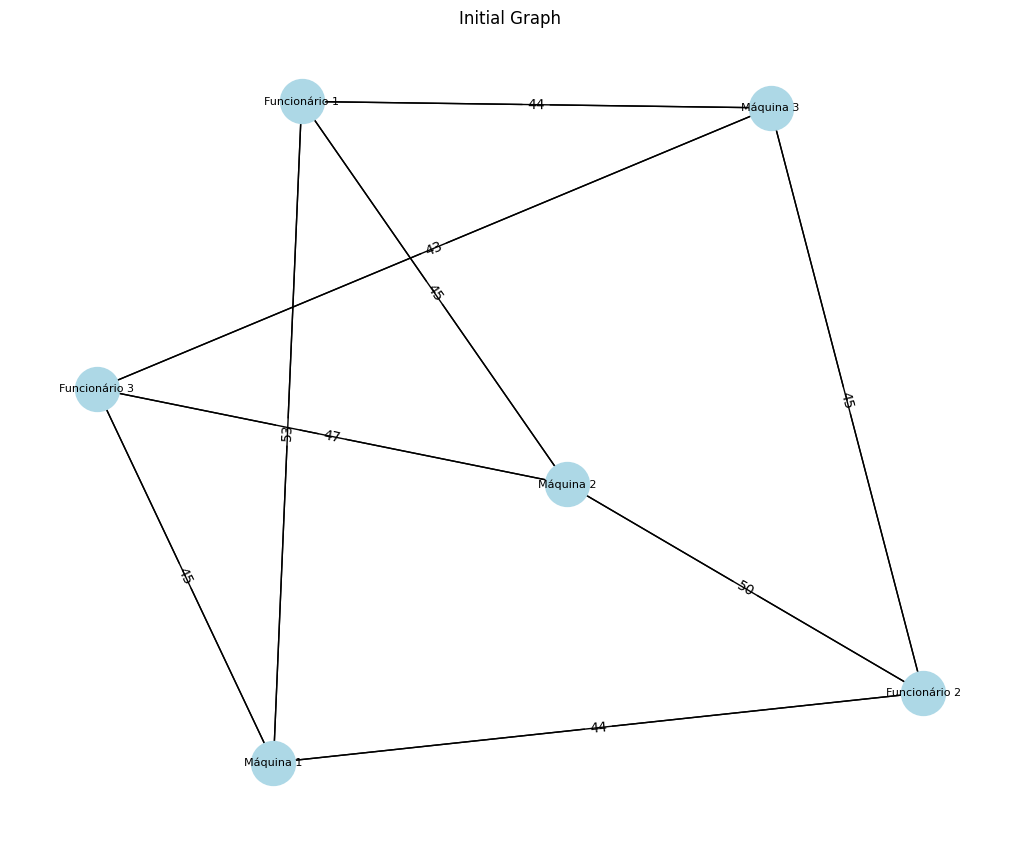

In [ ]:
G_initial = create_graph(np.array(cost_matrix), [])
pos_initial = nx.spring_layout(G_initial)
visualize_graph(G_initial, pos_initial, 'Initial Graph')

## Aplicando o *hungarian_algorithm*

Agora, aplicaremos o algoritmo do Método Húngaro para encontrar a alocação ótima. Utilizaremos a matriz-custo previamente declarada para ilustrar o processo passo a passo. Além disso, visualizaremos o grafo inicial e o resultado final.


In [ ]:
matching = hungarian_algorithm(cost_matrix)
matching

[(0, 1), (1, 0), (2, 2)]

### Visualizando as etapas da solução

Para entender melhor o processo de resolução com o Método Húngaro, apresentaremos as etapas passo a passo. Isso incluirá a adição de arestas no grafo, destacando as escolhas feitas pelo algoritmo em cada passo e exibindo os custos associados.

In [ ]:
print_matching_steps(np.array(cost_matrix), matching)

Passo a passo do Método Húngaro:
Passo 1: Aresta adicionada entre os nós 0 e 1.
Custo Atual: 45

Passo 2: Aresta adicionada entre os nós 1 e 0.
Custo Atual: 44

Passo 3: Aresta adicionada entre os nós 2 e 2.
Custo Atual: 43



## Grafo resultante

O grafo resultante após a aplicação do Método Húngaro exibirá as arestas escolhidas, refletindo a alocação otimizada entre funcionários e máquinas. As arestas destacadas representarão as conexões estabelecidas, e os custos associados a cada conexão serão apresentados para uma compreensão abrangente.

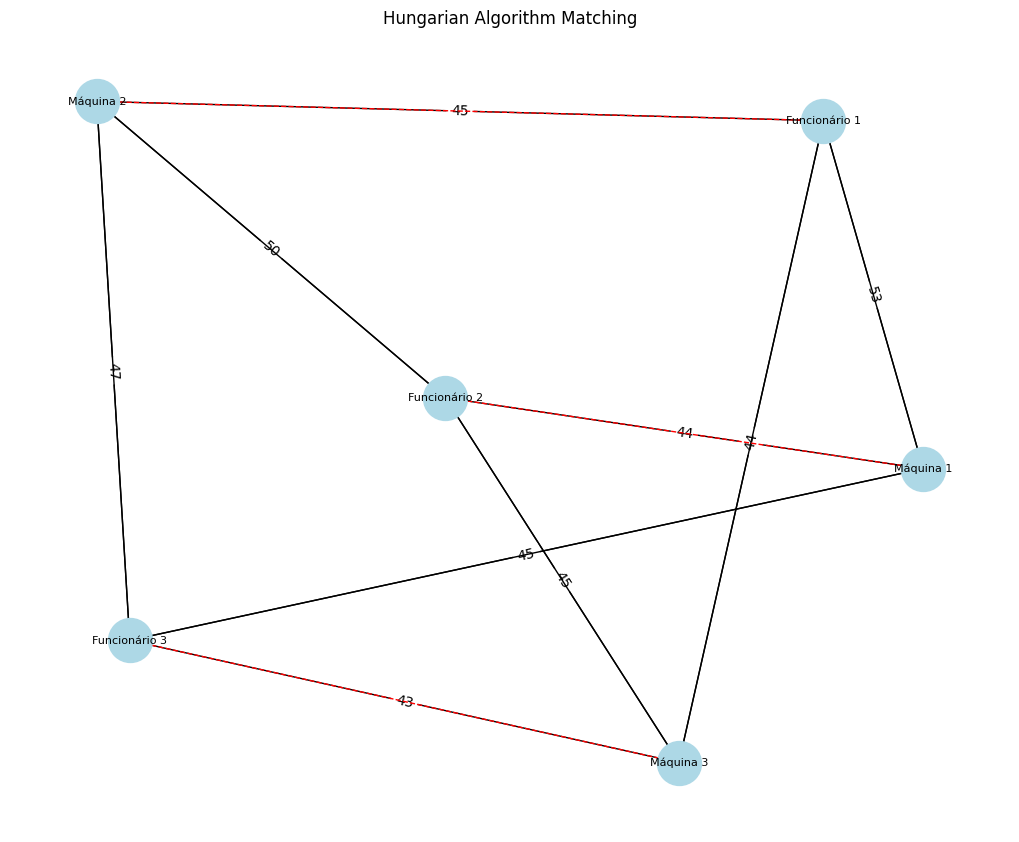

In [ ]:
matching = hungarian_algorithm(cost_matrix)
G_final = create_graph(np.array(cost_matrix), matching)
pos_final = nx.spring_layout(G_final)
visualize_graph(G_final, pos_final, 'Hungarian Algorithm Matching')